In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.a2c import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import matplotlib.pyplot as plt
import torch

norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 30
n_features = 4

env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

actor_model = Actor(
    state_dim=batch_dur*n_features+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*n_features+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.0008),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.0005),
    hyprprms={
        'gamma': 0.9995,
    },
    log_freq=1,
    mdl_pth='../models/a2c_nn_3',
    load_models=False,
)

In [2]:
a2c.run(1000)


Ep: 0 | TS: 24195 | L: 19.724 | R: 8.8 | P: -10.22 | R.Avg P: -10.22 | NW: 89.78 | R.Avg NW: 89.78 | R.U: 174
Ep: 1 | TS: 40352 | L: 16.223 | R: 10.94 | P: -19.18 | R.Avg P: -14.7 | NW: 80.82 | R.Avg NW: 85.3 | R.U: 169
Ep: 2 | TS: 65929 | L: 9.212 | R: -1.93 | P: 17.46 | R.Avg P: -3.98 | NW: 117.46 | R.Avg NW: 96.02 | R.U: 204
Ep: 3 | TS: 83436 | L: 5.906 | R: -4.39 | P: 29.28 | R.Avg P: 4.34 | NW: 129.28 | R.Avg NW: 104.34 | R.U: 221
Ep: 4 | TS: 120914 | L: 1.996 | R: 0.4 | P: 10.18 | R.Avg P: 5.5 | NW: 110.18 | R.Avg NW: 105.5 | R.U: 234
Ep: 5 | TS: 167350 | L: 1.03 | R: 1.42 | P: 10.69 | R.Avg P: 6.37 | NW: 110.69 | R.Avg NW: 106.37 | R.U: 243
Ep: 6 | TS: 221804 | L: 0.894 | R: 15.17 | P: 75.48 | R.Avg P: 16.24 | NW: 175.48 | R.Avg NW: 116.24 | R.U: 276
Ep: 7 | TS: 238329 | L: 1.129 | R: 2.42 | P: 7.05 | R.Avg P: 15.09 | NW: 107.05 | R.Avg NW: 115.09 | R.U: 270
Ep: 8 | TS: 253949 | L: 1.58 | R: -1.04 | P: -2.86 | R.Avg P: 13.1 | NW: 97.14 | R.Avg NW: 113.1 | R.U: 263
Ep: 9 | TS: 2

KeyboardInterrupt: 

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


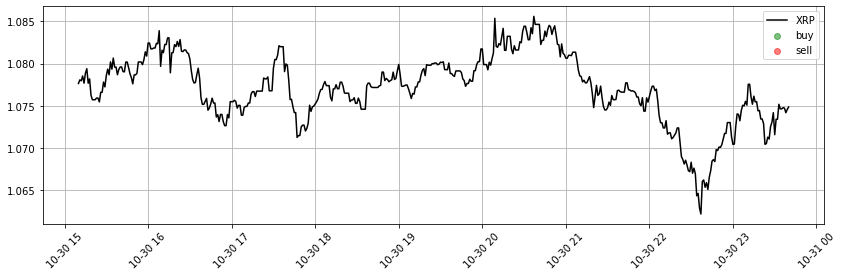

Avg.Rewards: -100.0 | Max.Profit: 0.0 | Avg.Profit: 0.0 | Avg.Units: 0 


In [4]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-10-30 15:15', duration=500, show_pred=False)

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


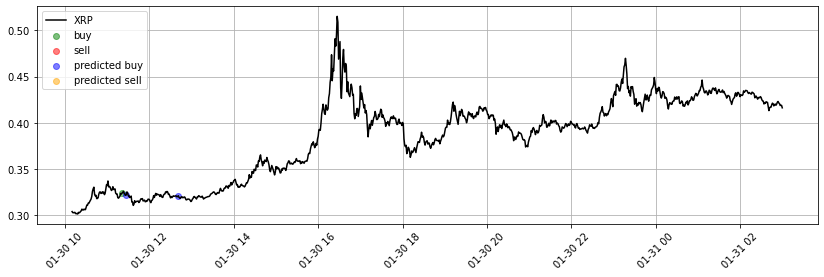

Avg.Rewards: 16.05 | Max.Profit: 58.8 | Avg.Profit: 18.72 | Avg.Units: 287 


In [8]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-01-30 10:15', duration=1000, show_pred=True)

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


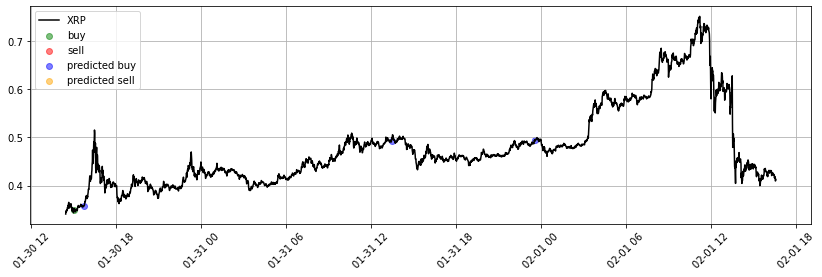

Avg.Rewards: 40.11 | Max.Profit: 114.03 | Avg.Profit: 36.37 | Avg.Units: 282 


In [10]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-01-30 14:30', duration=3000, show_pred=True)

## Visualizations

### Training 

Text(0.5, 1.0, 'Rolling avg balance per episode')

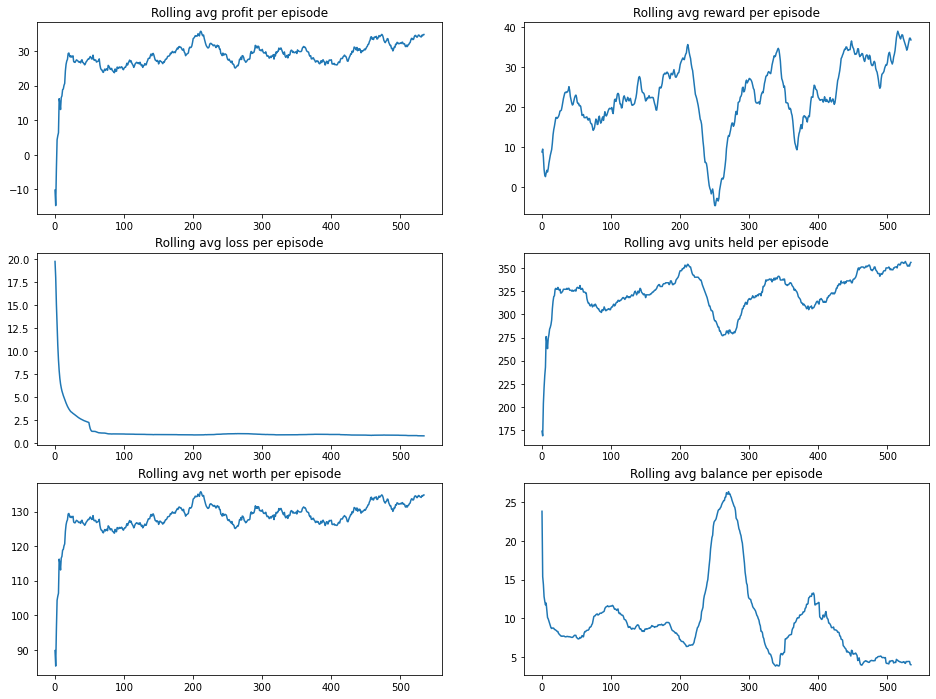

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[0][0].plot(range(count), r_avg_profits)
ax[0][0].set_title('Rolling avg profit per episode')

ax[1][0].plot(range(count), r_avg_loss)
ax[1][0].set_title('Rolling avg loss per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [12]:
torch.save(a2c.actor.state_dict(), '../models/a2c_final/actor')
torch.save(a2c.critic.state_dict(), '../models/a2c_final/critic')

In [13]:
import pickle
with open("../pickles/a2c_logs_final.pickle","wb") as f:
    temp = dict(a2c.logs)
    pickle.dump(temp, f, pickle.HIGHEST_PROTOCOL)